# Lab 2 - Gradient Descent For Logistic Regression
Name: Yadu Krishnan Madhu
Section: 10
Student Number: 500975010

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import random
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Importing Dataset
data = pd.read_csv('https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv')
data = data.iloc[0:, 1:]

## EDA

How much is the percentage of each class 0 and 1?

In [3]:
class_0 = 0
class_1 = 0
for status in data['chd']:
    if (status):
        class_1 += 1
    else:
        class_0 += 1
        
# print(class_1)
print(f'Percentage for class 0 is : {round((class_0 * 100) / len(data["chd"]))}')
print(f'Percentage for class 1 is : {round((class_1 * 100) / len(data["chd"]))}')

Percentage for class 0 is : 65
Percentage for class 1 is : 35


How many missing values do we have ?

In [4]:
# How many missing values do we have?
# Count missing values in each column
missingValsInEachColumn = data.isnull().sum()

print("The number of missing values is: \n" + str(missingValsInEachColumn))

missingValsTotal = missingValsInEachColumn.sum()

print("\n\nThe total number of missing values is: \n" + str(missingValsTotal))

The number of missing values is: 
sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64


The total number of missing values is: 
0


How many categorical variables do we have ? :


There is 1 which is: Famhist(Present, Absent)

What features have the maximum correlation?

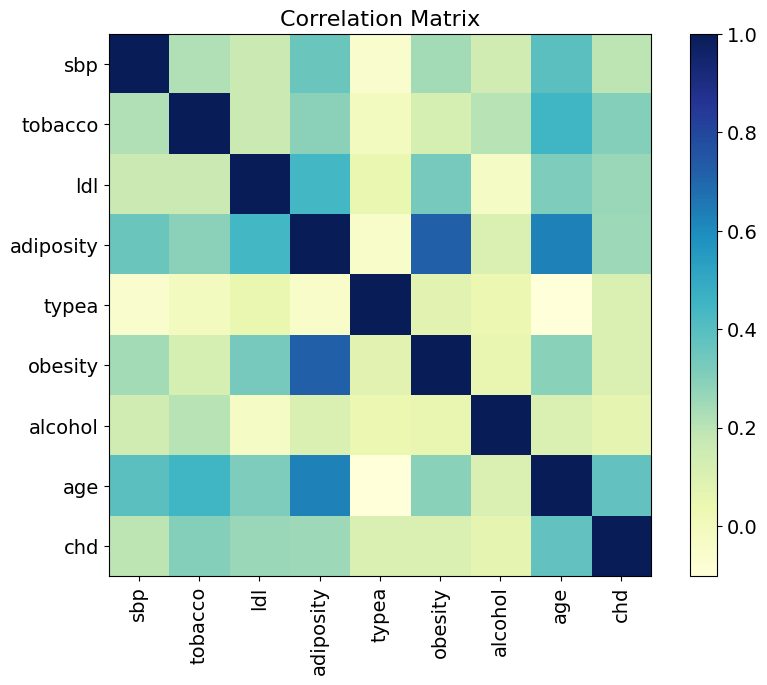

In [5]:
data_numeric = data

f = plt.figure(figsize=(10, 7))
plt.matshow(data_numeric.corr(numeric_only=True), fignum=f.number, cmap='YlGnBu')
plt.xticks(range(data_numeric.select_dtypes(['number']).shape[1]), data_numeric.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(data_numeric.select_dtypes(['number']).shape[1]), data_numeric.select_dtypes(['number']).columns, fontsize=14)

color_bar = plt.colorbar()
color_bar.ax.tick_params(labelsize=14)

plt.gca().xaxis.set_label_position('bottom')
plt.gca().xaxis.set_ticks_position('bottom')
plt.title('Correlation Matrix', fontsize=16)

plt.show()

From the figure above, few pairs have a very high correlation relative to other pairs.

The highest however appears to be (adiposity, obesity) which sits around 0.7

## One-Hot-Encoding

Encode the categorical variables

In [6]:
new_data = pd.get_dummies(data, columns=['famhist'])

## Standardization

In [7]:
sbpCol = data['sbp'].values.reshape(-1, 1)
tobaccoCol = data['tobacco'].values.reshape(-1, 1)
ldlCol = data['ldl'].values.reshape(-1, 1)
adiposityCol = data['adiposity'].values.reshape(-1, 1)
famhistCol = data['famhist'].values.reshape(-1, 1)
typeaCol = data['typea'].values.reshape(-1, 1)
obesityCol = data['obesity'].values.reshape(-1, 1)
alcoholCol = data['alcohol'].values.reshape(-1, 1)
ageCol = data['age'].values.reshape(-1, 1)
chdCol = data['chd'].values.reshape(-1, 1)

sbpStd = (sbpCol - sbpCol.mean())/(sbpCol.std())
tobaccoStd = (tobaccoCol - tobaccoCol.mean())/(tobaccoCol.std())
ldlStd = (ldlCol - ldlCol.mean())/(ldlCol.std())
adiposityStd = (adiposityCol - adiposityCol.mean())/(adiposityCol.std())
typeaStd = (typeaCol - typeaCol.mean())/(typeaCol.std())
obesityStd = (obesityCol - obesityCol.mean())/(obesityCol.std())
alcoholStd = (alcoholCol - alcoholCol.mean())/(alcoholCol.std())
ageStd = (ageCol - ageCol.mean())/(ageCol.std())

sbpStandReversed = sbpStd.reshape(-1)
tobaccoStandReversed = tobaccoStd.reshape(-1)
ldlStandReversed = ldlStd.reshape(-1)
adiposityStandReversed = adiposityStd.reshape(-1)
typeaStandReversed = typeaStd.reshape(-1)
obesityStandReversed = obesityStd.reshape(-1)
alcoholStandReversed = alcoholStd.reshape(-1)
ageStandReversed = ageStd.reshape(-1)

data_std = new_data

data_std['sbp'] = sbpStandReversed
data_std['tobacco'] = tobaccoStandReversed
data_std['ldl'] = ldlStandReversed
data_std['adiposity'] = adiposityStandReversed
data_std['typea'] = typeaStandReversed
data_std['obesity'] = obesityStandReversed
data_std['alcohol'] = alcoholStandReversed
data_std['age'] = ageStandReversed

data_std = data_std.drop(data_std.columns[8], axis=1)
data_std.insert(0, 'x0', [1] * 462)

## Hypothesis Model

Define the sigmoid function

In [8]:
def sigmoid_func(x, theta):
    z = np.dot(x, theta)
    return 1 / (1 + np.exp(-z))

## Cost Function

In [9]:
def cost_func(theta, x, y):
    m = len(y)
    h = sigmoid_func(x, theta)
    cost = -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

## Batch Gradient Descent Iteration

In [10]:
def gradientDescent(theta, x, y, learning_rate, epochs):
    m = len(y)
    cost_history = []

    for epoch in range(epochs):
        hTheta = sigmoid_func(x, theta)
        gradient = np.dot(x.T, (y - hTheta))
        theta += (learning_rate / m) * gradient

        cost_epoch = cost_func(theta, x, y)
        cost_history.append(cost_epoch)

        if epoch == 0:
            pass
        if epoch != 0 and epoch % (epochs - 1) == 0:
            pass

    return theta, cost_history

## Initialization

In [11]:
# Training function for batch gradient descent
def trainFull(x, y, thetaJ, learning_rate, epochs):
    theta = thetaJ.copy()  # Initialize parameters
    theta_final, cost_history = gradientDescent(theta, x, y, learning_rate, epochs)
    return theta_final, cost_history

# Extract features and target
xTrain = np.array(data_std.values, dtype=np.float64)
yTrain = data['chd'].values

### Learning Curves

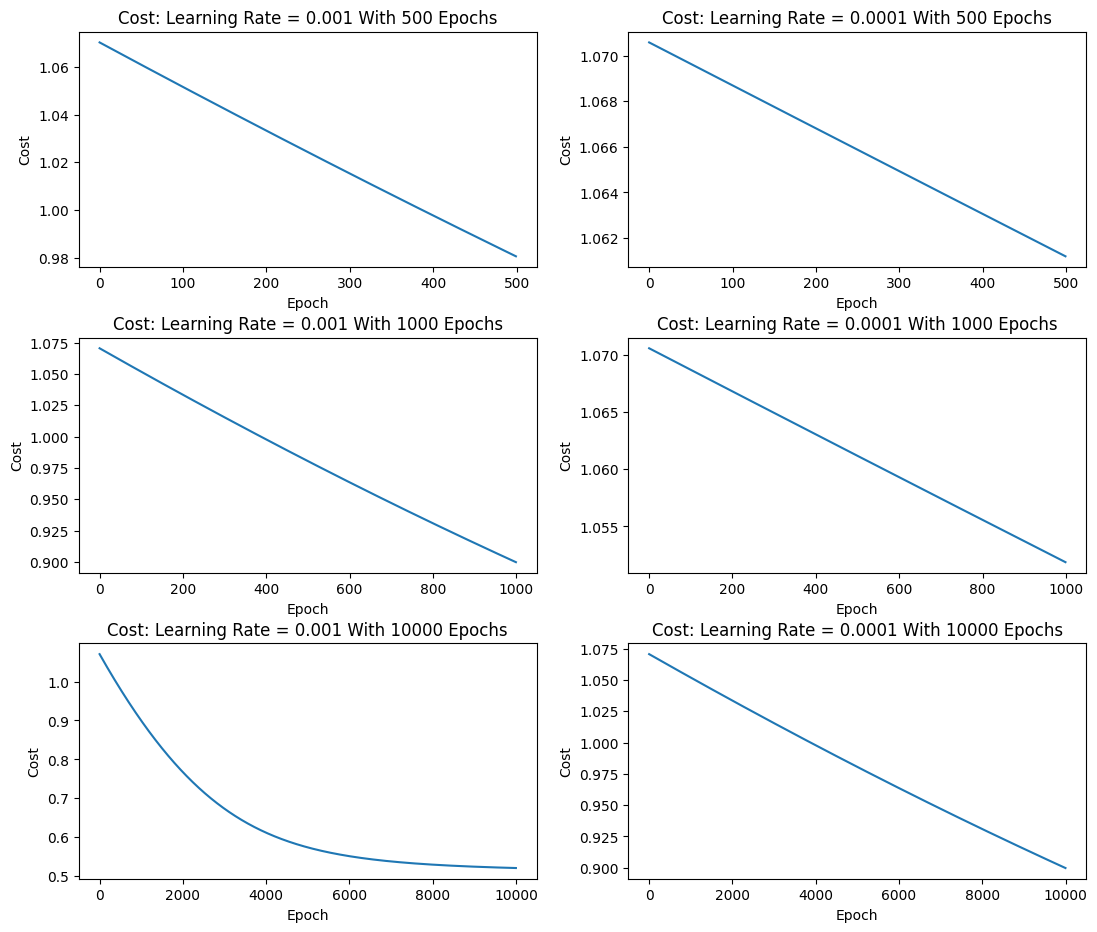

In [ ]:
# Initialize parameters
thetaJ = np.array([round(random.uniform(0.01, 0.99), 2) for _ in range(xTrain.shape[1])])

# Training
learningRates = [0.001, 0.0001]
epochs = [500, 1000, 10000]

fig, pos = plt.subplots(3, 2, figsize=(13, 11))
plt.subplots_adjust(hspace=0.3)

trackThetaFB = []

for index1, epoch in enumerate(epochs):
  for index2, differentRates in enumerate(learningRates):
    theta_final, cost_history = trainFull(xTrain, yTrain, thetaJ, differentRates, epoch)
    trackThetaFB.append(theta_final)

    # Plot cost history
    pos[index1, index2].plot(cost_history)
    pos[index1, index2].set_title(f'Cost: Learning Rate = {differentRates} With {epoch} Epochs')
    pos[index1, index2].set_xlabel('Epoch')
    pos[index1, index2].set_ylabel('Cost')

plt.show()

### Based on what you see in the learning curve, what value for epoch does seem reasonable to stop training for each learning rates (cost will not decrease significantly anymore)? 

Based on the learning curve for 0.001 learning rate. 10 000 Epochs has the effect of convergence, hence the least error was found. With 0.0001 learning rate, a higher learning rate did help with finding reduced errors, however convergent beahaviour cannot be found from observing the graph. 10 000 Epochs however leads to the theta with least error.

In conclusion, for a learning rate of 0.001, 10 000 Epochs is needed for this case to reach convergence and low error. For a learning rate of 0.0001, 10 000 Epochs showed the lowest error, however convergent behvaiour is not observed hence, more training is required.

## Mini-batch Gradient Descent Iteration

Initial Theta:
[0.06 0.52 0.95 0.81 0.83 0.57 0.48 0.87 0.59 0.84 0.83]


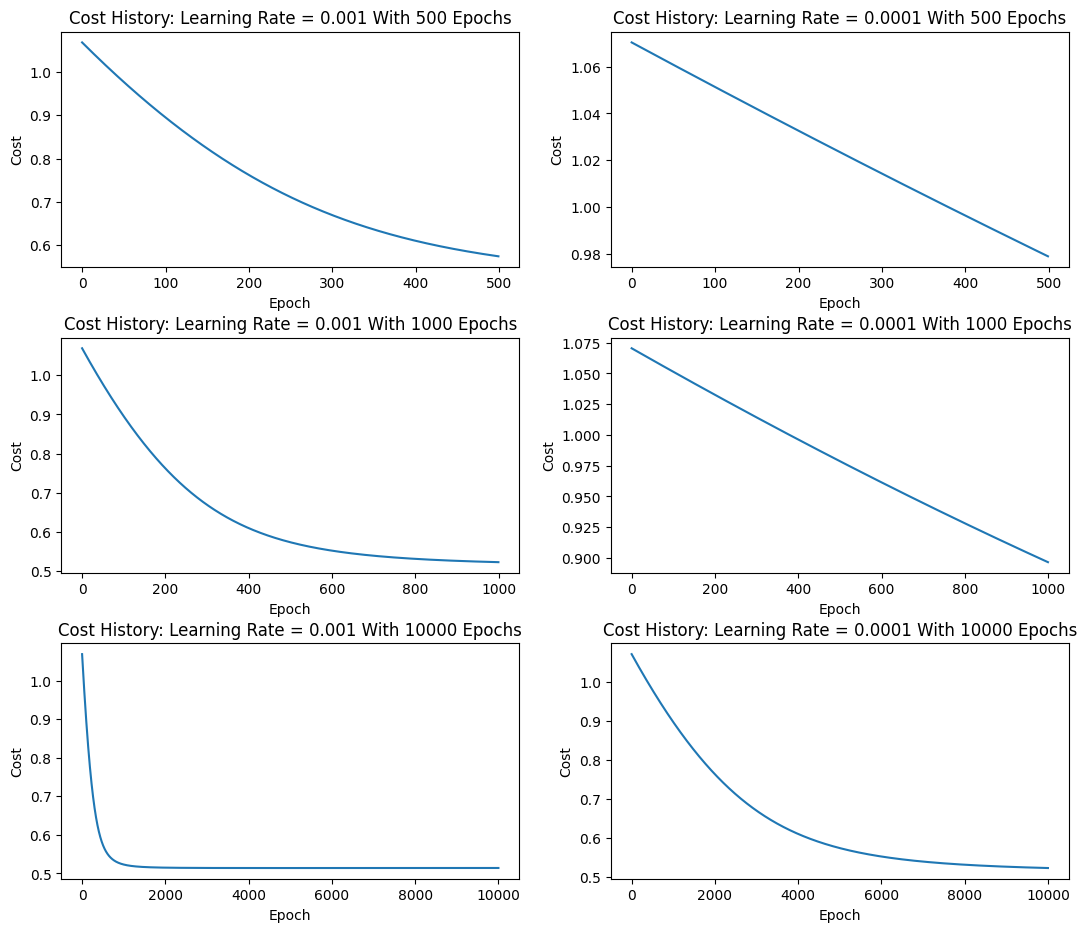

In [ ]:
# Sigmoid function
def sigmoidMini_func(x, theta):
    z = np.dot(x, theta)
    return 1 / (1 + np.exp(-z))

# Cost function For Mini Batch
def costMini_func(theta, x, y):
    m = len(y)
    h = sigmoidMini_func(x, theta)
    cost = -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

# Gradient Descent function for mini-batch
def miniBatchGradientDescent(theta, x, y, learning_rate, batchSize, epochs):
    m = len(y)
    cost_history = []
    for epoch in range(epochs):
        # Mini-batch gradient descent
        for i in range(0, m, batchSize):
            xBatch = x[i:i+batchSize]
            yBatch = y[i:i+batchSize]
            hTheta = sigmoidMini_func(xBatch, theta)
            gradient = np.dot(xBatch.T, (yBatch - hTheta))
            theta += (learning_rate / len(yBatch)) * gradient

        # Compute cost and store history
        cost_epoch = costMini_func(theta, x, y)
        cost_history.append(cost_epoch)

        if (epoch == 0):
            pass
        if (epoch != 0) and (epoch % (epochs - 1) == 0):
            pass

    return theta, cost_history

# Training function
def trainMini(x, y, thetaJ, learning_rate, batch_size, epochs):
    theta = thetaJ.copy()
    cost_history = []
    theta_final, cost_history = miniBatchGradientDescent(theta, x, y, learning_rate, batch_size, epochs)
    return theta_final, cost_history

# Extract features and target
xTrainMini = np.array(data_std.values, dtype=np.float64)
yTrainMini = data['chd'].values

# Initialize parameters
thetaJMini = thetaJ

# Training
learningRates = [0.001, 0.0001]
epochs = [500, 1000, 10000]
batchSize = 50

fig, pos = plt.subplots(3, 2, figsize=(13, 11))
plt.subplots_adjust(hspace=0.3)

print("Initial Theta:")
print(thetaJMini)

trackThetaMB = []

for index1, epoch in enumerate(epochs):
  for index2, differentRates in enumerate(learningRates):
        theta_final, cost_history = trainMini(xTrainMini, yTrainMini, thetaJMini, differentRates, batchSize, epoch)
        trackThetaMB.append(theta_final)

        # Plot cost history
        pos[index1, index2].plot(cost_history)
        pos[index1, index2].set_title(f'Cost History: Learning Rate = {differentRates} With {epoch} Epochs')
        pos[index1, index2].set_xlabel('Epoch')
        pos[index1, index2].set_ylabel('Cost')

plt.show()

### Based on what you see in the learning curve, what value for epoch does seem reasonable to stop training for each learning rates (cost will not decrease significantly anymore)? 

Based on the graphs for learning rate of 0.001, the best epoch seems to be at 500 epochs since the convergent behaviour can be observed which remains similiar to the one with 1000 epochs.

For learning rate of 0.0001, the convergent behaviour can be seen for the graph with 10 0000 epochs, the other two graphs shows linear progression where a lower error is yet to be found.

In conclusion, for learning rate of 0.001, 500 Epochs is reasonable and for learning rate of 0.0001, 10 000 epochs seem to be reasonable

## Compare with implemented library

In [14]:
# Comparing coefficients
count = 0
print("\n\nCoefficients from Full Batch:\n\n")
for epoch in epochs:
  for differentRates in learningRates:
    print(f"Coefficients For Full Batch With Learning Rate = {differentRates} And Epochs = {epoch}: {trackThetaFB[count]}")
    count += 1

count = 0
print("\n\nCoefficients from Mini Batch:\n\n")
for epoch in epochs:
  for differentRates in learningRates:
    print(f"Coefficients For Mini Batch With Learning Rate = {differentRates} And Epochs = {epoch}: {trackThetaMB[count]}")
    count += 1

# Sklearn coefficients
reg1 = LogisticRegression(max_iter=500, solver='lbfgs')
reg1.fit(xTrain, yTrain)

reg2 = LogisticRegression(max_iter=1000, solver='lbfgs')
reg2.fit(xTrain, yTrain)

reg3 = LogisticRegression(max_iter=10000, solver='lbfgs')
reg3.fit(xTrain, yTrain)


print("\n\nCoefficients from SKLearns LogisticRegression (EPOCH = 500):\n\n")
print(reg1.coef_[0])

print("\n\nCoefficients from SKLearns LogisticRegression (EPOCH = 1000):\n\n")
print(reg2.coef_[0])

print("\n\nCoefficients from SKLearns LogisticRegression (EPOCH = 10000):\n\n")
print(reg3.coef_[0])



Coefficients from Full Batch:


Coefficients For Full Batch With Learning Rate = 0.001 And Epochs = 500: [-0.06180134  0.48201225  0.92304834  0.77272205  0.74548544  0.56695795
  0.39809204  0.81632465  0.55006166  0.75809963  0.79009903]
Coefficients For Full Batch With Learning Rate = 0.0001 And Epochs = 500: [0.04746212 0.51617465 0.94737681 0.80624736 0.82135825 0.56976913
 0.47164718 0.86464778 0.58588964 0.83159463 0.82586749]
Coefficients For Full Batch With Learning Rate = 0.001 And Epochs = 1000: [-0.17536238  0.44491448  0.89467029  0.7362434   0.66575117  0.56231911
  0.32025965  0.76247746  0.51306225  0.68113658  0.75350105]
Coefficients For Full Batch With Learning Rate = 0.0001 And Epochs = 1000: [0.03500268 0.51235404 0.94473695 0.80249926 0.8127566  0.56952182
 0.46332852 0.85929153 0.58180377 0.82323657 0.82176611]
Coefficients For Full Batch With Learning Rate = 0.001 And Epochs = 10000: [-0.98953733  0.16257834  0.50512692  0.42359954  0.17212056  0.40812226
 -0.